In [1]:
#######################################################
# Module 10 Challenge - SQLAlchemy
# Name: Thet Win
# Date: July 15, 2024
# 
# This program uses SQLAlchemy to carry out Data Analysis the climate of Honolulu Hawaii.
# The program also analyzes a list of  Stations
#
#######################################################


%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func


In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

C:\Users\User\AppData\Local\Temp\ipykernel_8064\4196587217.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Check: Create the inspector and connect it to the engine
inspector = inspect(engine)

# Check: Using the inspector to print the column names within the 'Measurement' table and its types
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# Check: details of the schema for Measurement
columns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'primary_key': 0}]

In [10]:
# Check: Using the inspector to print the column names within the 'Station' table and its types
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Check: details of the schema for Station
columns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'primary_key': 0}]

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
max_dt=session.query(func.max(Measurement.date))[0][0]
print(max_dt)


2017-08-23


In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
max_dt_strp = dt.datetime.strptime(max_dt, "%Y-%m-%d")

# Calculate the previous year date from the last date in data set.
prev_year_strp = max_dt_strp - dt.timedelta(days=365)

# Format the date to - YYYY-MM-DD
prev_year_formatted = prev_year_strp.strftime("%Y-%m-%d")

# Check: Display the formatted date
prev_year_formatted

'2016-08-23'

In [15]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=prev_year_formatted).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
results_df = pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort the dataframe by date
results_df = results_df.sort_values('date')

# Display sample results
results_df.head()


,date,precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


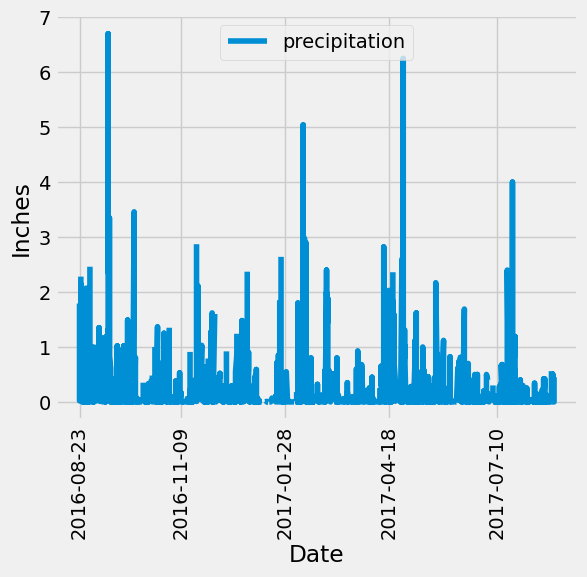

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(6,5))
plt.plot(results_df['date'], results_df['precipitation'], linestyle = '-', label= 'precipitation')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(loc='upper center')

# Set up the X-Axis labels
index = ['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10']

# Set the x-ticks
plt.xticks(index, rotation=90)
plt.show()


In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
results_df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
ttl_stations = session.query(Station).count()
ttl_stations


9

In [19]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations=session.query(Measurement.station, 
   func.count(Measurement.station)). \
      group_by(Measurement.station). \
         order_by(func.count(Measurement.station). \
                  desc()).all()

active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Most active station
most_actv_stn = active_stations=session.query(Measurement.station, 
   func.count(Measurement.station)). \
      group_by(Measurement.station). \
         order_by(func.count(Measurement.station). \
                  desc()).first()[0]

most_actv_stn


'USC00519281'

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature_summary = session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
).filter(Measurement.station==most_actv_stn).one()

# Display result
temperature_summary

(54.0, 85.0, 71.66378066378067)

In [22]:
# Using the most active station id
# Calculate latest date for station==most_actv_stn
max_dt_station=session.query(func.max(Measurement.date)).filter(Measurement.station==most_actv_stn).scalar()
print(max_dt_station)


2017-08-18


In [23]:
# Calculate the previous year date from latest date for station=='USC00519281'
prev_yr_sation = dt.datetime.strptime(max_dt_station, '%Y-%m-%d') - dt.timedelta(days=365)

# Format the date to - YYYY-MM-DD
prev_yr_sation_formatted = prev_yr_sation.strftime("%Y-%m-%d")

# Check: Display the formatted date
print(prev_yr_sation_formatted)

2016-08-18


In [24]:
# Query the last 12 months of temperature observation data (tob) for the most active station
temperature_data = session.query(Measurement.date, Measurement.tobs).filter(
    Measurement.station == most_actv_stn,
    Measurement.date >= prev_yr_sation_formatted
).all()

# Created a list for the temperature
temp_list = [{'date': date, 'temperature': temp} for date, temp in temperature_data]

# Check: Display the results
temp_list


[{'date': '2016-08-18', 'temperature': 80.0},
 {'date': '2016-08-19', 'temperature': 79.0},
 {'date': '2016-08-20', 'temperature': 81.0},
 {'date': '2016-08-21', 'temperature': 79.0},
 {'date': '2016-08-22', 'temperature': 78.0},
 {'date': '2016-08-23', 'temperature': 77.0},
 {'date': '2016-08-24', 'temperature': 77.0},
 {'date': '2016-08-25', 'temperature': 80.0},
 {'date': '2016-08-26', 'temperature': 80.0},
 {'date': '2016-08-27', 'temperature': 75.0},
 {'date': '2016-08-28', 'temperature': 73.0},
 {'date': '2016-08-29', 'temperature': 78.0},
 {'date': '2016-08-30', 'temperature': 77.0},
 {'date': '2016-08-31', 'temperature': 78.0},
 {'date': '2016-09-01', 'temperature': 80.0},
 {'date': '2016-09-02', 'temperature': 80.0},
 {'date': '2016-09-03', 'temperature': 78.0},
 {'date': '2016-09-04', 'temperature': 78.0},
 {'date': '2016-09-05', 'temperature': 78.0},
 {'date': '2016-09-06', 'temperature': 73.0},
 {'date': '2016-09-07', 'temperature': 74.0},
 {'date': '2016-09-08', 'temperatu

In [25]:
# List of temperatures for plotting
temp_list_plot = [temp[1] for temp in temperature_data]
temp_list_plot

[80.0,
 79.0,
 81.0,
 79.0,
 78.0,
 77.0,
 77.0,
 80.0,
 80.0,
 75.0,
 73.0,
 78.0,
 77.0,
 78.0,
 80.0,
 80.0,
 78.0,
 78.0,
 78.0,
 73.0,
 74.0,
 80.0,
 79.0,
 77.0,
 80.0,
 76.0,
 79.0,
 75.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 76.0,
 74.0,
 77.0,
 78.0,
 79.0,
 79.0,
 77.0,
 80.0,
 78.0,
 78.0,
 78.0,
 77.0,
 79.0,
 79.0,
 79.0,
 79.0,
 75.0,
 76.0,
 73.0,
 72.0,
 71.0,
 77.0,
 79.0,
 78.0,
 79.0,
 77.0,
 79.0,
 77.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 74.0,
 75.0,
 76.0,
 73.0,
 76.0,
 74.0,
 77.0,
 76.0,
 76.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 71.0,
 63.0,
 70.0,
 68.0,
 67.0,
 77.0,
 74.0,
 77.0,
 76.0,
 76.0,
 75.0,
 76.0,
 75.0,
 73.0,
 75.0,
 73.0,
 75.0,
 74.0,
 75.0,
 74.0,
 75.0,
 73.0,
 75.0,
 73.0,
 73.0,
 74.0,
 70.0,
 72.0,
 70.0,
 67.0,
 67.0,
 69.0,
 70.0,
 68.0,
 69.0,
 69.0,
 66.0,
 65.0,
 68.0,
 62.0,
 75.0,
 70.0,
 69.0,
 76.0,
 76.0,
 74.0,
 73.0,
 71.0,
 74.0,
 74.0,
 72.0,
 71.0,
 72.0,
 74.0,
 69.0,
 67.0,
 72.0,
 70.0,
 64.0,
 63.0,
 63.0,
 62.0,
 70.0,

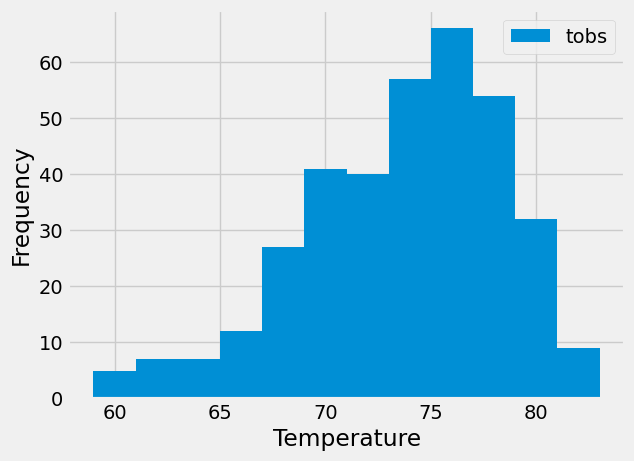

In [26]:
# Plot graph with 12 bars representing the months of the year
plt.hist(temp_list_plot, bins=12, label = 'tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

# Close Session

In [27]:
# Close Session
session.close()